# Re-do: Veamos cuál sería el uso común de galaxychop (desp de este refactoring) y exploremos ~~todas~~ la mayoría de las posibilidades que ofrece

### 1st: import glxchop

In [1]:
import galaxychop as gchop
# Por ahora lo veamos importando más librerías solo cuando sea necesario (en un uso típico)

### Leamos alguna glx

In [2]:
gal = gchop.io.read_hdf5("../tests/datasets/gal394242.h5")
gal

<Galaxy stars=37393, dark_matter=155101, gas=80153, potential=True>

In [3]:
# Si la quiero como dataframe (check both forms)
df_gal = gal.to_dataframe()
df_gal

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,stars,0,5.224283e+05,0.045630,0.023792,-0.036427,10.773575,-6.878906,-20.425400,0.0,-195699.620206,290.293111,-195409.327095,-0.736533,0.539572,-0.570209
1,stars,0,9.745897e+05,-0.094469,0.054867,0.006084,20.282349,8.661957,-7.947495,0.0,-196176.962277,274.782915,-195902.179362,-0.488759,-0.627390,-1.931126
2,stars,0,6.935776e+05,-0.172213,-0.000511,0.047600,-14.897980,6.957092,-10.818886,0.0,-195152.120168,193.699612,-194958.420557,-0.325631,-2.572295,-1.205710
3,stars,0,1.070959e+06,-0.081766,-0.116694,0.177133,-8.665253,-4.337433,5.506927,0.0,-194695.767625,62.113089,-194633.654536,0.125676,-1.084623,-0.656530
4,stars,0,6.013803e+05,0.020734,0.023444,0.101449,23.508469,-7.842865,-3.754723,0.0,-195703.942688,314.128285,-195389.814402,0.707622,2.462754,-0.713749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272642,gas,2,1.429845e+06,44.246486,-253.661747,-240.888732,-44.183670,-152.597656,69.413803,0.0,-17314.963254,15028.258726,-2286.704528,-54366.682527,7572.031389,-17959.617014
272643,gas,2,1.436841e+06,-37.380023,-250.988099,-125.929722,-69.019005,-67.030350,35.370728,0.0,-20910.620132,5253.889589,-15656.730543,-17318.744973,10013.702701,-14817.352798
272644,gas,2,1.690580e+06,16.542737,-267.716920,-226.546536,-61.974457,-122.167450,98.398193,0.0,-17358.735183,14223.961789,-3134.773394,-54019.473934,12412.323127,-18612.594663
272645,gas,2,1.210975e+06,-220.426329,79.421367,46.584759,-96.530602,18.881409,-45.233887,0.0,-23427.833806,5860.384564,-17567.449242,-4472.122980,-14467.594426,3504.632690


### Remember, esta librería sirve para analizar galaxias de simulaciones hydro/N-body i.e. quiero estudiar las propiedades dinámicas de la misma. Entonces, podemos:

* ### i) asegurarnos de que esté preprocesada (siendo que la glx proviene de una simulación cosmológica o ideal);
* ### ii) transformar paso a paso esta galaxia (centrado, alineado, cortado, etc) para;
* ### iii) terminar descomponiendo la galaxia según la dinámica de sus estrellas (dado método de descomposición).

In [7]:
# 1st, check if centered, align, and if it has the potential energy calculated
# (entirely and only stars):
print(f'The stellar particles have their potential energy calculated?'+\
      f' {gal.stars.has_potential_}')
print(f'The system has its potential energy calculated?'+\
      f' {gal.has_potential_}')


The stellar particles have their potential energy calculated? True
The system has its potential energy calculated? True


In [8]:
# Then, exploiting the refactor, check if center and align:

Centralizer = gchop.preproc.Centralizer(with_potential=True)
# Because I already check that the galaxy has the potential computed
Aligner = gchop.preproc.Aligner(r_cut=30.)  # The default. I don't know the galaxy size
# (Maybe debería explicar ese paso previo? Pero la gracia es que todavía no sé cómo es mi galaxia;
# Visual check usando el módulo plot and then check if centred or aligned?)

print(f'The galaxy is centered?'+\
      f' {Centralizer.checker(gal)}')
print(f'The galaxy is aligned?'+\
      f' {Aligner.checker(gal)}')

The galaxy is centered? False
The galaxy is aligned? False


/home/bceliz/anaconda3/envs/try2_glxchop/lib/python3.11/site-packages/galaxychop/preproc/salign.py:257: UserWarning: Input Galaxy is not centered. Please, center it                 with Centralizer.transform(galaxy, with_potential)                 or proceed with caution.
  warnings.warn(


#### *El checker del align no debería decir nada del centrado, sólo el transform hinchar los huevos (warning, ni siquiera una exception porque eso queda para el usuario)

In [9]:
# I want to dynamically decompose my galaxy, it is posible straightforward?
Decomposer = gchop.models.JThreshold(eps_cut=0.7)

decomp_glx = Decomposer.decompose(gal)

#### It shouldn't be possible without any warning/exception...

In [10]:
decomp_glx

<Galaxy stars=37393, dark_matter=155101, gas=80153, potential=True>
<Components length=272647, labels=['Disk', 'Spheroid', 'nan'], probabilities=False, lmap=True>

In [2]:
# Una galaxia chiquita:
ID = 664038

# Su .hdf5:
# CAMBIAR SEGÚN EL PATH DONDE ESTÉ EL ARCHIVO
# (el archivo se llama "cutout_664038.hdf5")
part = h5py.File(f'cutout_{ID}.hdf5','r')
names = list(part['PartType4'].keys())

#Leemos sus props (y armamos arrays):
h = 0.6774

x_s = part['PartType4']['Coordinates'][:,0] /h
y_s = part['PartType4']['Coordinates'][:,1] /h
z_s = part['PartType4']['Coordinates'][:,2] /h
vx_s = part['PartType4']['Velocities'][:,0]
vy_s = part['PartType4']['Velocities'][:,1]
vz_s = part['PartType4']['Velocities'][:,2]
mass_s = part['PartType4']['Masses'][:] * (1e+10)/h
W_s = part['PartType4']['Potential'][:]

x_dm = part['PartType1']['Coordinates'][:,0] /h
y_dm = part['PartType1']['Coordinates'][:,1] /h
z_dm = part['PartType1']['Coordinates'][:,2] /h
vx_dm = part['PartType1']['Velocities'][:,0]
vy_dm = part['PartType1']['Velocities'][:,1]
vz_dm = part['PartType1']['Velocities'][:,2]
mass_dm = np.full(len(x_dm),4.5e+5)  # Es así para TNG50-1
W_dm = part['PartType1']['Potential'][:]

x_g = part['PartType0']['Coordinates'][:,0] /h
y_g = part['PartType0']['Coordinates'][:,1] /h
z_g = part['PartType0']['Coordinates'][:,2] /h
vx_g = part['PartType0']['Velocities'][:,0]
vy_g = part['PartType0']['Velocities'][:,1]
vz_g = part['PartType0']['Velocities'][:,2]
mass_g = part['PartType0']['Masses'][:] * (1e+10)/h
W_g = part['PartType0']['Potential'][:]

In [3]:
gal = gchop.mkgalaxy(mass_s,x_s,y_s,z_s,vx_s,vy_s,vz_s,
                     mass_dm,x_dm,y_dm,z_dm,vx_dm,vy_dm,vz_dm,
                     mass_g,x_g,y_g,z_g,vx_g,vy_g,vz_g,
                     softening_s = 0.39,softening_dm = 0.39,softening_g = 0.39,
                     potential_s = W_s,potential_dm = W_dm,potential_g = W_g)

In [4]:
df_gal = gal.to_dataframe()
df_gal

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,stars,0,27126.333984,1876.364788,10941.539387,27539.606423,-8.900466,-50.376022,63.396873,0.39,-20965.576172,3318.062744,-17647.513672,2.080995e+06,-3.640710e+05,2.861004e+03
1,stars,0,61607.902344,1876.286774,10941.598796,27539.660348,-17.631023,-54.344379,68.287895,0.39,-20910.843750,3963.700684,-16947.142578,2.243805e+06,-6.136801e+05,9.094594e+04
2,stars,0,51444.574219,1876.338083,10941.567894,27539.588120,-5.091568,-47.009865,73.079422,0.39,-20979.847656,3788.226807,-17191.621094,2.094236e+06,-2.773414e+05,-3.249666e+04
3,stars,0,49572.902344,1876.316562,10941.580608,27539.609009,-18.172131,-49.587101,53.167103,0.39,-21010.824219,2807.923828,-18202.900391,1.947342e+06,-6.002117e+05,1.057907e+05
4,stars,0,47812.937500,1876.352440,10941.652421,27539.571629,-7.128507,-52.525951,74.375496,0.39,-20866.636719,4170.752930,-16695.882812,2.260333e+06,-3.358707e+05,-2.055955e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626242,gas,2,68398.960938,1824.032647,10911.410244,27455.238153,-44.066044,-135.860809,151.226273,0.39,20277.189453,21634.679688,41911.867188,5.380183e+06,-1.485685e+06,2.330081e+05
626243,gas,2,69618.781250,1823.948888,10906.807322,27450.003313,-35.555679,-134.468277,125.141960,0.39,21090.607422,17503.216797,38593.824219,5.056054e+06,-1.204256e+06,1.425357e+05
626244,gas,2,103788.789062,1864.965080,10943.542221,27520.726521,-125.966530,-32.564880,-46.469913,0.39,10694.756836,9543.745117,20238.501953,3.876637e+05,-3.380026e+06,1.317788e+06
626245,gas,2,68247.281250,1799.913105,10889.327961,27409.715964,-30.894306,-81.631783,126.590179,0.39,24938.363281,11821.639648,36760.003906,3.615986e+06,-1.074655e+06,1.894881e+05


In [5]:
gal_wo_pot = gchop.mkgalaxy(mass_s,x_s,y_s,z_s,vx_s,vy_s,vz_s,
                     mass_dm,x_dm,y_dm,z_dm,vx_dm,vy_dm,vz_dm,
                     mass_g,x_g,y_g,z_g,vx_g,vy_g,vz_g,)
                     #softening_s = 0.39,softening_dm = 0.39,softening_g = 0.39,
                     #potential_s = W_s,potential_dm = W_dm,potential_g = W_g)
df_gal_wo_pot = gal_wo_pot.to_dataframe()
        
gal, gal_wo_pot

(<Galaxy stars=41942, dark_matter=391372, gas=192933, potential=True>,
 <Galaxy stars=41942, dark_matter=391372, gas=192933, potential=False>)

## Armo mis transformadores

### Potentializer

In [6]:
# El default el numpy porque no compiló el de fortran (no tengo GCC ni OMP...)
poter = gchop.preproc.potential_energy.Potentializer()

CREATED POTENCIALIZER WITH BACKEND  numpy


In [7]:
poter.checker(gal), poter.checker(gal_wo_pot)

(True, False)

In [8]:
# Esto NO porque "unable to allocate ~1.4 TiB" (!!!)
#poter.transform(gal_wo_pot)

### Centralizer

In [9]:
ctrl = gchop.preproc.Centralizer(with_potential=False)

In [10]:
gal_ctrl = ctrl.transform(gal)

In [11]:
df_gal_ctrl = gal_ctrl.to_dataframe()

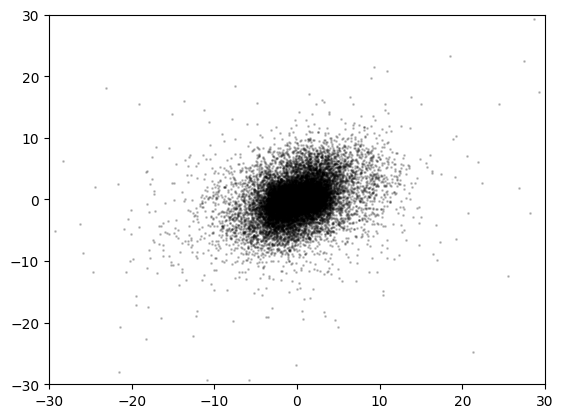

In [12]:
plt.scatter(gal_ctrl.stars.x,gal_ctrl.stars.z,s=1,c='k',alpha=0.2)
plt.xlim(-30,30)
plt.ylim(-30,30)

plt.show()
plt.close()

## * **No está alineado, pero ni siquiera bien centrado (!)** Esto es por usar como parte del sistema al gas... O uso sólo estrellas o quizás con el CM se soluciona, idk

### Aligner

In [13]:
align = gchop.preproc.Aligner(r_cut=10)

In [14]:
gal_algn = align.transform(gal_ctrl)

In [15]:
df_gal_algn = gal_algn.to_dataframe()

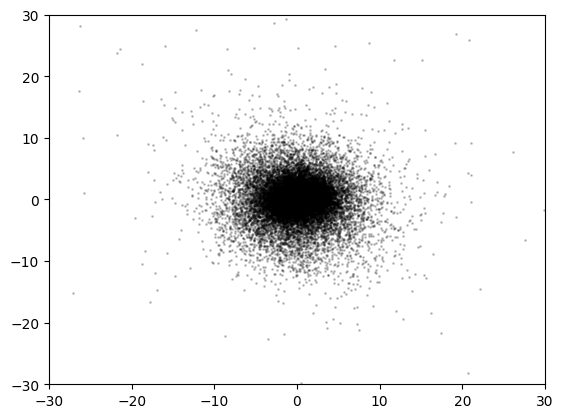

In [16]:
plt.scatter(gal_algn.stars.x,gal_algn.stars.y,s=1,c='k',alpha=0.2)
plt.xlim(-30,30)
plt.ylim(-30,30)

plt.show()
plt.close()

### Cutter

In [17]:
cuttr = gchop.preproc.Cutter(num_radii=1)  # Para probar

In [18]:
r_sh = gchop.preproc.smr_crop.get_radius_half_mass(gal_algn, particle='stars')
r_sh

1.9027493571076808

## ----o----

## ¿Está bien calculado?

In [19]:
M_star_tot = np.sum(gal_algn.stars.m)
M_star_tot

<Quantity 2.5022536e+09 solMass>

In [20]:
r = LA.norm((df_gal_algn.x,df_gal_algn.y,df_gal_algn.z), axis=0)
r

array([2.43681106e-02, 1.12081884e-01, 2.49921255e-02, ...,
       2.21230639e+01, 1.59490390e+02, 1.36927758e+02])

In [21]:
df_gal_algn['r'] = r
df_aux = df_gal_algn.sort_values('r')
# Me quedo con las estrellas:
cond = (df_aux['ptypev'] == 0)

In [22]:
cumsum = np.cumsum(df_aux[cond].m)

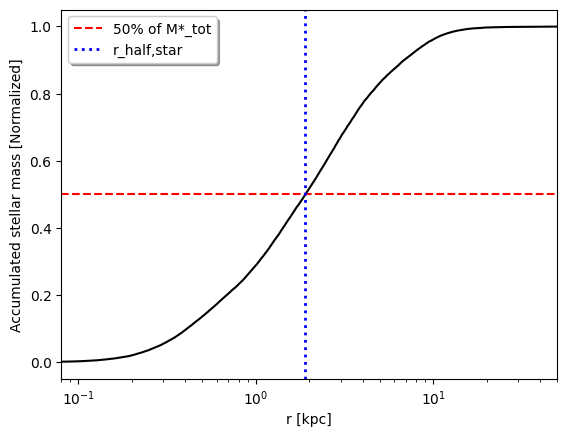

In [25]:
plt.plot(df_aux[cond]['r'],cumsum/M_star_tot,c='k')
plt.axhline(0.5,ls='--',c='r',label='50% of M*_tot')
plt.axvline(r_sh,ls=':',c='b',lw=2,label='r_half,star')

plt.xlim(0.08,50)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('r [kpc]')
plt.ylabel('Accumulated stellar mass [Normalized]')
plt.legend(loc='upper left', shadow=True)

plt.show()
plt.close()

## **¡La respuesta es que si!** Genial...

## ----o----

In [26]:
gal_cut = cuttr.transform(gal_algn)

In [27]:
df_gal_cut = gal_cut.to_dataframe()

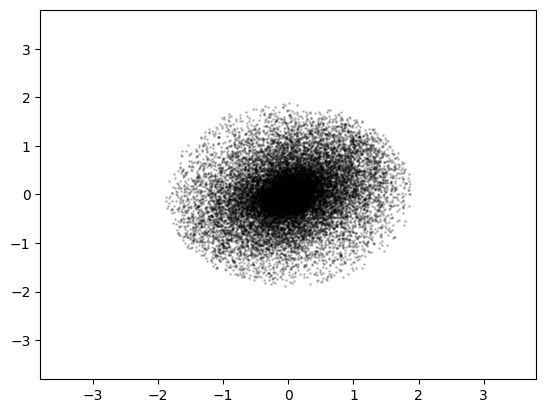

In [29]:
# Para graficarlo mejor, obtengamos el r_sh (!)
r_sh = gchop.preproc.smr_crop.get_radius_half_mass(gal_algn, particle='stars')

plt.scatter(gal_cut.stars.x,gal_cut.stars.y,s=1,c='k',alpha=0.2)
# Cambio la escala
plt.xlim(-2*r_sh,2*r_sh)
plt.ylim(-2*r_sh,2*r_sh)

plt.show()
plt.close()

## Armo la pipeline

In [30]:
# Noa grego el potentializer, si el cutter. ¡Para dif métodos de descomp, dif pipelines! (¿O no?)
pipeline = gchop.GchopPipeline(
    [("step_1",ctrl),("step_2",align),("step_3",cuttr),
     ("step_decomposition", gchop.models.JThreshold())]
)

In [31]:
gal_pipeline = pipeline.transform(gal)  # El otro es el 'pipeline.decompose'

In [32]:
gal_pipeline

<Galaxy stars=21345, dark_matter=391372, gas=192933, potential=True>

In [33]:
df_gal_pipeline = gal_pipeline.to_dataframe()

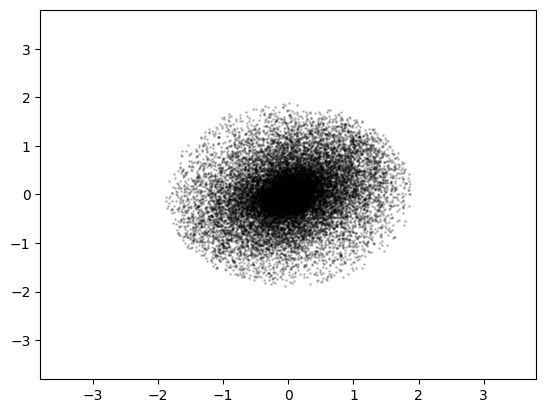

In [34]:
plt.scatter(gal_pipeline.stars.x,gal_pipeline.stars.y,s=1,c='k',alpha=0.2)
# Mantengo la escala del cut
plt.xlim(-2*r_sh,2*r_sh)
plt.ylim(-2*r_sh,2*r_sh)

plt.show()
plt.close()

# **-------------------------------**

## Quiero probar que me tire errores y me chequee bien los states de las Galaxy sin potencial:

In [33]:
ctr_pot = gchop.preproc.Centralizer(with_potential=True)
ctr_pot.transform(gal_wo_pot)

ValueError: Galaxy must has the potential energy. Use             with_potential = False

### Fantástique

# **-------------------------------**